In [2]:
import pandas as pd
import numpy as np

In [3]:
caminho = '/content/csv_result-ebay_confianca_completo.csv'
data = pd.read_csv(caminho)
data.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [3]:
data.shape

(5806, 75)

Bom     4299
Ruim    1507
Name: reputation, dtype: int64


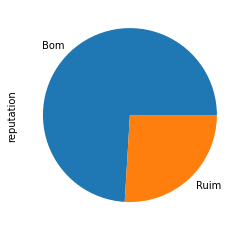

In [4]:
print(data['reputation'].value_counts());
data['reputation'].value_counts().plot(kind = 'pie');

In [5]:
data['reputation'] = data['reputation'].map({'Bom': 0, 'Ruim': 1})
print(data['reputation'].value_counts());

0    4299
1    1507
Name: reputation, dtype: int64


In [7]:
data['blacklist'] = data['blacklist'].map({'N' : 0, 'B' : 1})
data['blacklist'].value_counts()

0    5022
1     784
Name: blacklist, dtype: int64

In [8]:
X =  data.drop('reputation',axis = 1)
y = data['reputation']

In [9]:
X.shape, y.shape

((5806, 74), (5806,))

In [10]:
data.head(5)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,0,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,0
3,0,56,0,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,0
4,0,50,0,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,0
5,72,0,0,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,0
6,76,0,0,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, stratify = y)

In [13]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()


In [14]:
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
previsoes = modelo.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy = accuracy_score(previsoes, y_test)
accuracy

0.7451205510907003

[[1280  434]
 [  10   18]]


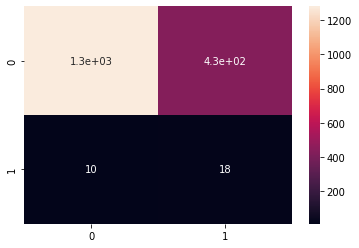

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(previsoes, y_test )
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True);

Undersampling